Categories: flood, car crash, no crash ; Folders - 
Train - 350
valid - 100

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
#from fastai import *
from fastai.vision import *
#from fastai.core import *

In [11]:
#from fastai.vision.models.wrn import wrn_22

In [2]:
bs = 32 # batch size
img_size = 24 # image size

In [3]:
path = Path('./new3')
path.ls() # output >>> ['test', 'labels.txt', 'train']

[WindowsPath('new3/archive'),
 WindowsPath('new3/models'),
 WindowsPath('new3/train'),
 WindowsPath('new3/valid')]

In [4]:
data = ImageDataBunch.from_folder(path, train='train', valid='valid',  ds_tfms=get_transforms(), size=224,bs = bs)

#data = ImageDataBunch.from_folder(path, ds_tfms=tfms, valid='test', size=img_size, bs = bs) 
# normalising the dataset using the same normalisation applied to the imagenet dataset


In [5]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList
y: CategoryList (912 items)
[Category car_crash, Category car_crash, Category car_crash, Category car_crash, Category car_crash]...
Path: new3
x: ImageItemList (912 items)
[Image (3, 441, 634), Image (3, 1080, 1920), Image (3, 683, 1024), Image (3, 1080, 1920), Image (3, 960, 1280)]...
Path: new3;

Valid: LabelList
y: CategoryList (188 items)
[Category car_crash, Category car_crash, Category car_crash, Category car_crash, Category car_crash]...
Path: new3
x: ImageItemList (188 items)
[Image (3, 300, 400), Image (3, 440, 660), Image (3, 330, 494), Image (3, 450, 800), Image (3, 1008, 1728)]...
Path: new3;

Test: None

In [6]:
#data.show_batch(rows=3, figsize=(10,10))

In [6]:
print(data.classes)
len(data.classes),data.c

['car_crash', 'flood']


(2, 2)

In [7]:
#https://docs.fast.ai/vision.learner.html
#learn = ConvLearner(data, models.resnet34, metrics=accuracy)  #old before fastai v1.0.14
learn = create_cnn(data,models.resnet18 , metrics=accuracy,callback_fns=ShowGraph)


epoch,train_loss,valid_loss,accuracy
1,0.431782,0.347763,0.888298
2,0.270795,0.304970,0.909574
3,0.206526,0.301463,0.904255


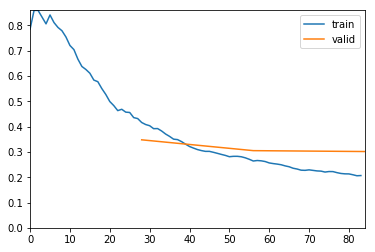

In [8]:
learn.fit_one_cycle(3)

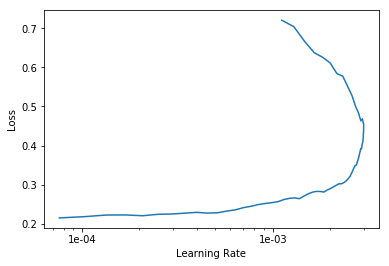

In [11]:
learn.recorder.plot()

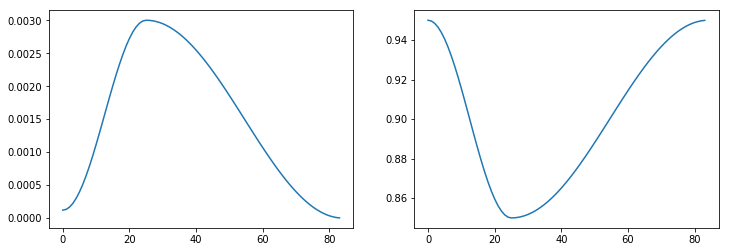

In [10]:
learn.recorder.plot_lr(show_moms=True)

In [12]:
accuracy(*learn.TTA())

tensor(0.9149)

In [13]:
interp = ClassificationInterpretation.from_learner(learn)


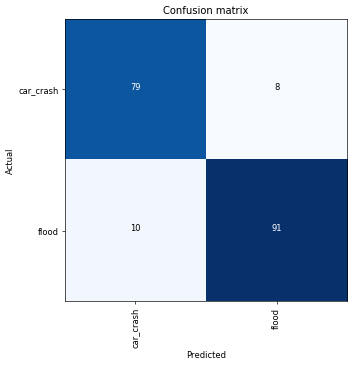

In [14]:
interp.plot_confusion_matrix(figsize=(8,6), dpi=60)

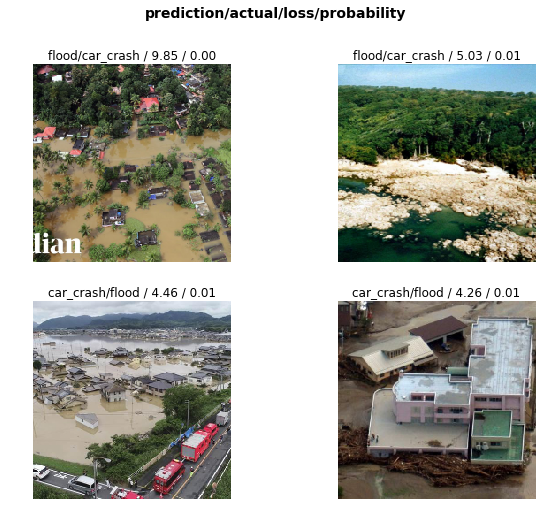

In [16]:
interp.plot_top_losses(4, figsize=(10,8))

In [15]:
learn.save('hp_V004-1')

In [ ]:
#learn = load_learner(path)
#learn = load_learner(path, test=ImageItemList.from_folder(path/'test'))

In [ ]:
#preds,y = learn.get_preds(ds_type=DatasetType.Test)
#preds[:5]

In [ ]:
#Return predicted class, label and probabilities for item.
#img = learn.data.train_ds[2][0]
#learn.predict(img)

In [ ]:
#data.train_ds[400][0]